# Análisis de Clustering de Investigadores
Este notebook realiza el análisis de clustering utilizando un dataset importado de investigadores.


## Descripción
Este análisis se centra en explorar los perfiles de investigadores basándose en diferentes variables relacionadas con su desempeño y actividades. Utilizamos un enfoque de clustering para identificar grupos significativos.

El flujo del análisis es el siguiente:
1. Importación de los datos.
2. Preparación del dataset para clustering.
3. Aplicación del modelo K-Means y análisis de resultados.
4. Visualización de los clusters en un espacio reducido (PCA).
5. Interpretación de los clusters mediante gráficos de radar.

---


## Paso 1: Importar los datos

In [ ]:

import pandas as pd

# Importar el dataset
df = pd.read_csv('dataset_investigadores.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())


Primeras filas del dataset:
   Publicaciones_Anuales  Citas_Totales   Índice_H  \
0              11.297589    3748.357077  34.308678   
1              10.313137    3268.291154  32.671351   
2              12.332768    4232.824384  33.871118   
3               8.337469    3199.146694  44.261391   
4               9.840467    3869.233290  35.856841   

   Colaboración_Internacional  Horas_Docencia_Semanal  Financiamiento_Anual  \
0                   40.230299                8.158426         376743.472915   
1                    5.867198                2.974338         331424.733260   
2                   10.752518                2.698013         337569.801835   
3                   14.422891                5.417727         104032.987612   
4                   21.988963                4.078722         405712.222622   

   Estudiantes_PHD_Supervisados  Índice_Interdisciplinario  \
0                      2.531693                  32.957884   
1                      0.000000                 

## Paso 2: Análisis de Clustering y Visualización

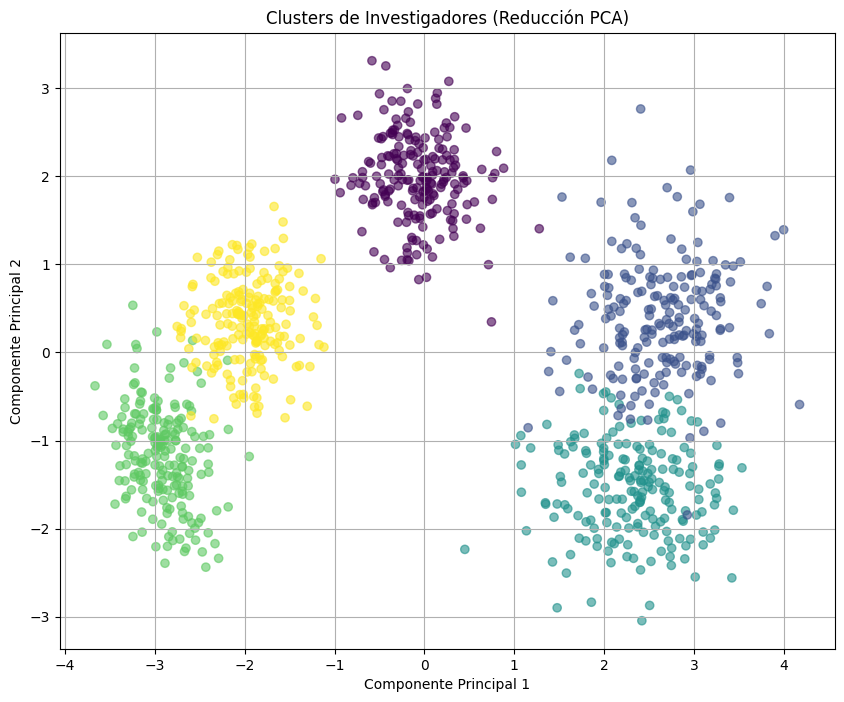

In [2]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Variables para clustering
variables_numericas = [
    'Publicaciones_Anuales', 'Citas_Totales', 'Índice_H',
    'Colaboración_Internacional', 'Horas_Docencia_Semanal',
    'Financiamiento_Anual', 'Estudiantes_PHD_Supervisados',
    'Índice_Interdisciplinario', 'Asistencia_Conferencias_Anual',
    'Papers_En_Revistas_Top'
]
X = df[variables_numericas]

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

#Exportar con la columna cluster
df.to_csv('dataset_investigadores_con cluster.csv', index=False)

# Visualizar los clusters con PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Investigadores (Reducción PCA)')
plt.grid(True)
plt.show()


## Paso 3: Análisis de los Centroides

In [3]:

# Obtener los centroides
centroides = kmeans.cluster_centers_

# Desescalar los centroides
centroides_desescalados = scaler.inverse_transform(centroides)
centroides_df = pd.DataFrame(centroides_desescalados, columns=variables_numericas)

# Mostrar los centroides
print("Centroides de los clusters:")
print(centroides_df)

# Interpretar los centroides
for i, row in centroides_df.iterrows():
    print(f"\nCaracterísticas del Cluster {i}:")
    for variable in variables_numericas:
        print(f"  {variable}: {row[variable]:.2f}")


Centroides de los clusters:
   Publicaciones_Anuales  Citas_Totales   Índice_H  \
0              10.159891    2052.590263  24.769614   
1              14.912638    2477.110813  28.291873   
2              11.841026    3513.799414  35.198083   
3               3.010864     291.958554   9.717939   
4               4.000886     777.533989   7.832204   

   Colaboración_Internacional  Horas_Docencia_Semanal  Financiamiento_Anual  \
0                   79.781220                7.812044         146671.890551   
1                   48.693664                4.080081         617077.317776   
2                   25.367443                4.903345         310516.991861   
3                   29.513653               17.766683          79903.196060   
4                   66.275910               11.894283         122168.489765   

   Estudiantes_PHD_Supervisados  Índice_Interdisciplinario  \
0                     11.962802                  74.987498   
1                      7.899130                 

## Paso 4: Visualización de los Clusters con Gráfico de Radar

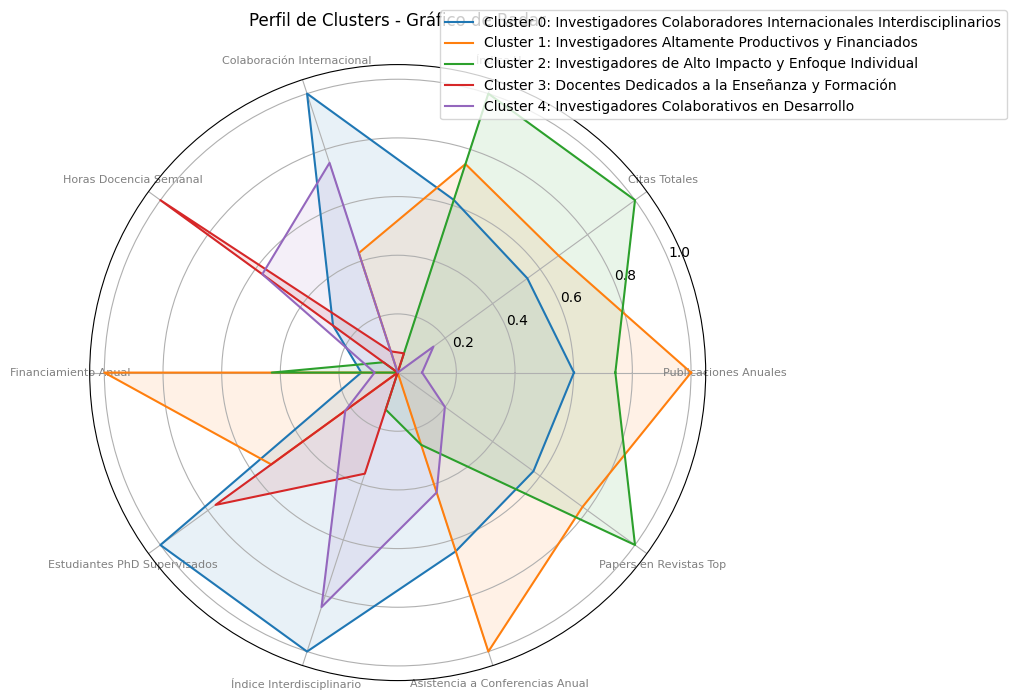

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Tipologías de los clusters
tipologias = [
    'Investigadores Colaboradores Internacionales Interdisciplinarios',  # Cluster 0
    'Investigadores Altamente Productivos y Financiados',                # Cluster 1
    'Investigadores de Alto Impacto y Enfoque Individual',              # Cluster 2
    'Docentes Dedicados a la Enseñanza y Formación',                    # Cluster 3
    'Investigadores Colaborativos en Desarrollo'                        # Cluster 4
]

# Datos de los centroides
variables_numericas = [
    'Publicaciones Anuales', 'Citas Totales', 'Índice H', 
    'Colaboración Internacional', 'Horas Docencia Semanal', 
    'Financiamiento Anual', 'Estudiantes PhD Supervisados', 
    'Índice Interdisciplinario', 'Asistencia a Conferencias Anual', 
    'Papers en Revistas Top'
]

datos_centroides = [
    [10.16, 2052.59, 24.77, 79.78, 7.81, 146671.89, 11.96, 74.99, 5.05, 3.90],  # Cluster 0
    [14.91, 2477.11, 28.29, 48.69, 4.08, 617077.32, 7.90, 35.33, 6.84, 4.92],  # Cluster 1
    [11.84, 3513.80, 35.20, 25.37, 4.90, 310516.99, 3.27, 40.58, 3.15, 6.01],  # Cluster 2
    [3.01, 291.96, 9.72, 29.51, 17.77, 79903.20, 9.94, 49.70, 1.86, 1.08],    # Cluster 3
    [4.00, 777.53, 7.83, 66.28, 11.89, 122168.49, 5.19, 68.67, 4.00, 2.06]     # Cluster 4
]

# Crear DataFrame de centroides
centroides_df = pd.DataFrame(datos_centroides, columns=variables_numericas)

# Normalizar los datos de los centroides
scaler_radar = MinMaxScaler()
centroides_normalizados = pd.DataFrame(
    scaler_radar.fit_transform(centroides_df), 
    columns=variables_numericas
)

# Añadir la primera fila al final para cerrar el gráfico de radar
centroides_normalizados = pd.concat(
    [centroides_normalizados, centroides_normalizados.iloc[[0]]], 
    ignore_index=True
)

# Configuración de ángulos para el gráfico
categorias = list(centroides_normalizados.columns)
N = len(categorias)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]

# Crear el gráfico de radar
plt.figure(figsize=(8, 8))

for i in range(len(centroides_normalizados)-1):
    valores = centroides_normalizados.iloc[i].values.flatten().tolist()
    valores += valores[:1]
    etiqueta = f'Cluster {i}: {tipologias[i]}'  # Añadimos la tipología al nombre del cluster
    plt.polar(angulos, valores, label=etiqueta)
    plt.fill(angulos, valores, alpha=0.1)

# Configuración de las etiquetas y el título
plt.xticks(angulos[:-1], categorias, color='grey', size=8)
plt.title('Perfil de Clusters - Gráfico de Radar', size=12, y=1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))
plt.show()
